In [129]:
python3 -m pip install matplot

SyntaxError: invalid syntax (4068455617.py, line 1)

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Problem 3
### 1.

In [131]:
df = pd.read_csv('./fullFreqData/fpga1.csv', header=None)

In [132]:
df.shape

(512, 100)

In [133]:
df_t = df.T

### 2.

In [134]:
means = df_t.describe().T["mean"]

In [135]:
means_np = np.array(means)

In [136]:
means_np_reshaped = np.flip(means_np.reshape(32, 16), axis=0)

In [137]:
means_np_reshaped.shape

(32, 16)

### 3.

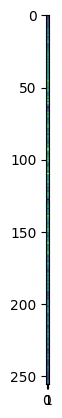

In [143]:
a = np.random.random((32, 16))
plt.imshow(means_np_reshaped, interpolation='nearest')
plt.show()

### 4.
The heatmap below show a visual representation of the FPGA die and of which PUF freqencies are higher/low. The top center of the FPGA had the higher measured PUF clock frequencies. This is probably due to the less interconnect delays in that area of the chip and allow the RO to achieve a higher frequency 

## Problem 4
### 1.

In [144]:
np.zeros

<function numpy.zeros>

In [142]:
array_of_pufs = []
for i in range(193):
    puf = np.zeros(256)
    df = pd.read_csv(f'./fullFreqData/fpga{i+1}.csv', header=None)
    df_t = df.T
    means = df_t.describe().T["mean"]
    means_np = np.array(means)
    means_np_reshaped = means_np.reshape(256, 2)
    for j in range(256):
        if means_np_reshaped[j, 0] >= means_np_reshaped[j, 1]:
            puf[j] = True
            # puf[j] = 1
        else:
            # puf[j] = 0
            puf[j] = False
        
    array_of_pufs.append(puf)
    # print(np.array(array_of_pufs)[i])

In [145]:
from array import array 

# 4.2 !!RETURN
# np_array_of_pufs = np.array(array_of_pufs)
fpga_puf_1 = array_of_pufs[0].astype(int)
# print(fpga_puf_1)
# hex_val = np.packbits(fpga_puf_1, None, 'big',)
# hex_val

In [146]:
# Number 4.3
unique_array_of_pufs = []
hamming = []
num_loops = 192 #Will stil loop through all 193 cause k=i+1
for i in range(num_loops):
    uniq_puf = np.zeros(256)
    puf1 = array_of_pufs[i].astype(bool) 
    k = i+1 
    while k <= num_loops:
        puf2 = array_of_pufs[k].astype(bool) 
        for j in range(256):
            uniq_puf[j] = puf1[j] ^ puf2[j]
            # print(puf1)
            # print(puf2)
        # print(uniq_puf)
        hamming = np.sum(uniq_puf, 0)
        # print(hamming)
        k+=1
    unique_array_of_pufs.append(hamming)

In [120]:
# Number 4.3
# hamming_dist = np.sum(unique_array_of_pufs, 1)
hamming_mean = (np.sum(unique_array_of_pufs, None)/np.size(unique_array_of_pufs))
print(hamming_mean)
print(np.median(unique_array_of_pufs, None))
print(np.std(unique_array_of_pufs, None))
# Number 4.4
print((hamming_mean/256) *100)

117.60416666666667
118.0
7.591770718277054
45.93912760416667
